In [1]:
#importing the important data frame and data visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing data set as dataframe
my_calls_data = pd.read_csv('911.csv')

#view the information about imported data
my_calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [3]:
#top 5 zipcodes for 911 calls
my_calls_data['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [4]:
#top 5 townships for 911 calls
my_calls_data['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [5]:
#how many unique title codes?
len(my_calls_data['title'].unique())

131

In [6]:
#common reasons for calls
#but first the data from title needs to be split at separator ':'
#for which we can use lambda function and save the data into new column called reason

from posixpath import split

my_calls_data['Reason'] = my_calls_data['title'].apply(lambda title: title.split(':')[0])

#above code will get the data record by record from dataset, use column 'title' and split the title at ':'. Once that is done, it will use the 0th element and put it into new column 'Reason'
my_calls_data['Reason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

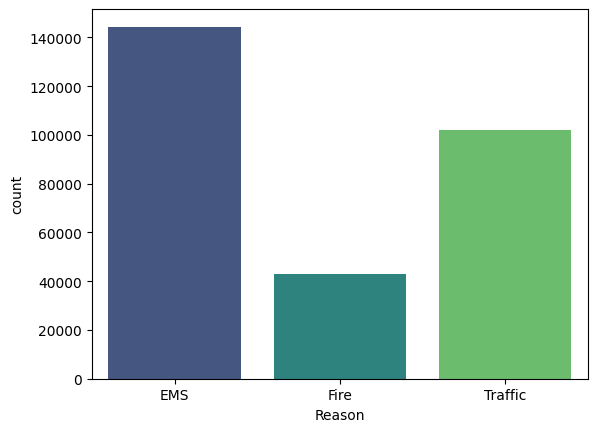

In [7]:
sns.countplot(x='Reason',data=my_calls_data,palette='viridis')

In [8]:
#to check at what time the calls were made frequently
#but first we need to check what is the data type of time stamp
type(my_calls_data['timeStamp'].iloc[0])

str

In [13]:
# because time stamp is string, we first need to convert time stamp in to date and time
my_calls_data['timeStamp'] = pd.to_datetime(my_calls_data['timeStamp'])
# this should convert str into date and time. use same code above to check the data type
type(my_calls_data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# now we can find out at which day in a week, at what hour and in which month the calls were made.
# we can create new columns to store these information as below
# first we will get the time in a variable
my_time = my_calls_data['timeStamp'].iloc[0]
my_time.dayofweek
# now we can get the data as month, day, and hour

my_calls_data['Month'] = my_calls_data['timeStamp'].apply(lambda time: time.month)
my_calls_data['Day'] = my_calls_data['timeStamp'].apply(lambda time: time.dayofweek)
my_calls_data['Hour'] = my_calls_data['timeStamp'].apply(lambda time: time.hour)

# however, the days are represented as 0,1,2,..,6 which needs to be converted to actual days. This can be done using map function

daymap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
my_calls_data['Day'] = my_calls_data['Day'].map(daymap)
my_calls_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Day,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,Thursday,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thursday,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,Thursday,16


<AxesSubplot:xlabel='Day', ylabel='count'>

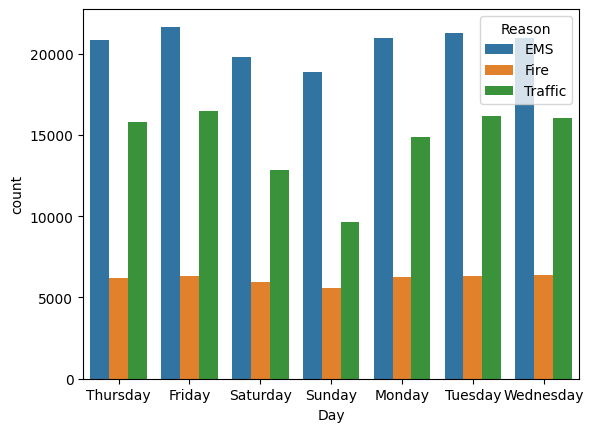

In [18]:
sns.countplot(x='Day',data=my_calls_data,hue='Reason')

<AxesSubplot:xlabel='Month', ylabel='count'>

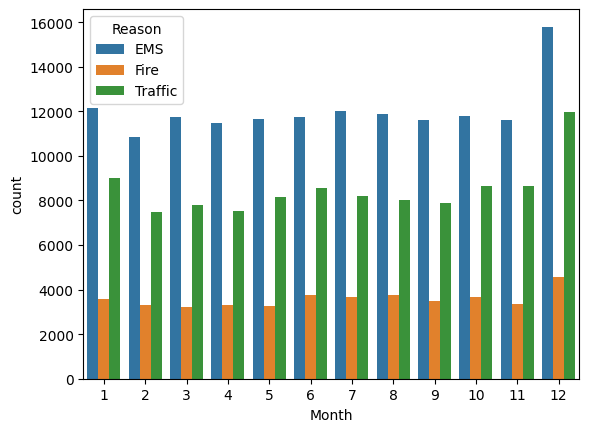

In [19]:
sns.countplot(x='Month',data=my_calls_data,hue='Reason')

<AxesSubplot:xlabel='Hour', ylabel='Day'>

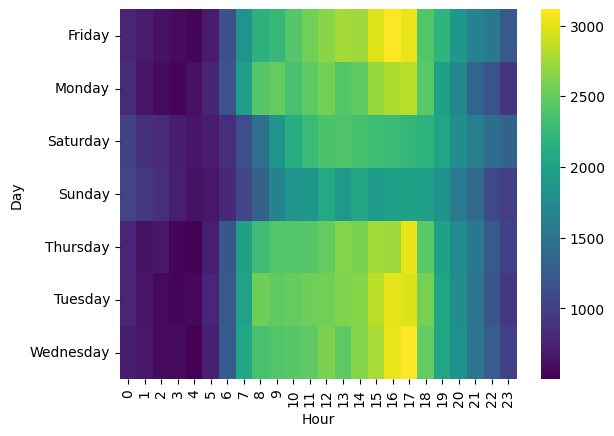

In [24]:
# now we will create the heatmap of calls per our for every day of week
# for this we will have to group the data by week and hour

myDayAndHour = my_calls_data.groupby(by=['Day','Hour']).count()['Reason'].unstack()

# as we now have the data grouped, we can plot heatmap

sns.heatmap(myDayAndHour,cmap='viridis')